Get Your Data
=============

Any way you want it
That's the way you need it
Any way you want it

We're going to load it using Numpy, as has been shown before.

In [1]:
import numpy as np

infile = "./DCTInfo.Hold6w.InstrumentTelemetry.2018-08-23-20-02.csv"
data = np.genfromtxt(infile, delimiter=",")

The file itself looks like this:
    
date,InstrumentTelemetry.mean_H1,InstrumentTelemetry.mean_S1,InstrumentTelemetry.mean_T1,InstrumentTelemetry.mean_T2
8/6/2018 2:34:26.000000000 PM,0.8333333333333334,-120.02,6.2200000000000015,18.713333333333335

...

So what did our data actually look like?

In [2]:
data[0]

array([nan, nan, nan, nan, nan])

In [3]:
data[1]

array([          nan,    0.83333333, -120.02      ,    6.22      ,
         18.71333333])

Well crap. That didn't really work. Let's fix up np.genfromtxt more by looking at the other options...
https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

Looks like we need some extra options. Let's try this:

In [4]:
data = np.genfromtxt(infile, delimiter=",", skip_header=1, names=True, dtype="S30,f,f,f,f")

In [5]:
data[0]

(b'8/6/2018 2:47:24.000000000 PM', 0., -120.02, 16.77111, 34.65333)

This is better, but we had to manually specify the data types (especially the date string). Not the best, honestly.

PS - Notice the b'...' part?  That means that it's really a *byte* string so it can only contain valid ASCII characters. If there are unicode characters in there, it'll barf. Also not the best.

So, can astropy save us?  You bet!

http://docs.astropy.org/en/stable/io/ascii/

In [6]:
from astropy.io import ascii

data = ascii.read(infile)

In [7]:
data[0]

date,InstrumentTelemetry.mean_H1,InstrumentTelemetry.mean_S1,InstrumentTelemetry.mean_T1,InstrumentTelemetry.mean_T2
str30,float64,float64,float64,float64
8/6/2018 2:34:26.000000000 PM,0.8333333333333334,-120.02,6.2200000000000015,18.713333333333335


In [8]:
# Let's look at a whole column, referencing it by its name
data['date']

8/6/2018 2:34:26.000000000 PM
8/6/2018 2:47:24.000000000 PM
8/6/2018 3:00:22.000000000 PM
8/6/2018 3:13:20.000000000 PM
8/6/2018 3:26:18.000000000 PM
8/6/2018 3:39:16.000000000 PM
8/6/2018 3:52:14.000000000 PM
8/6/2018 4:05:12.000000000 PM
8/6/2018 4:18:10.000000000 PM
8/6/2018 4:31:08.000000000 PM
8/6/2018 4:44:06.000000000 PM


**THAT WAS SO MUCH EASIER IT'S NOT EVEN FUNNY**

Ok. Now that we have the data, we need to make this time series into something plottable. The quickest and dirtiest way is to just plot the values as a function of their number within the series, completely ignoring the actual *time* part of the time series. Let's do that to just see what's in these data...

Let's Plot Some Stuff
=====================

In [9]:
import matplotlib.pyplot as plt


plt.plot(data['InstrumentTelemetry.mean_H1'])
plt.show()
plt.close()

<Figure size 640x480 with 1 Axes>

Note that we just gave plt.plot() one thing, and it plotted it as a function of the number of things in it. Handy! Especially for quick and dirty plots. What if we wanted the actual time information in there? How do we turn that string into something that matplotlib understands?

We parse it ourselves! See https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior since this is a weird non-standard format. This is the long way; if your format follows a standard (‘2000-01-01T00:00:00.000’) then it could be parsed automagically for you.

In [10]:
# Yes, this is pretty dumb looking. But datetime has a module called 'datetime' within it
#   It also has 'date' and 'time' modules, and 'datetime' is the combination of them.
#   It makes a bit more sense once you look at the documentation I swear.
from datetime import datetime as dt

In [11]:
# Trying to match "8/6/2018 2:34:26.000000000 PM" which is just plain awful.
#   "%f" below matches microseconds (000000) but we've really got nanoseconds
# Let's just parse "%f000" and hope there are never any nanosecond values.

t = [dt.strptime(ct, "%m/%d/%Y %I:%M:%S.%f000 %p") for ct in data['date']]

# Let's look at the 't' list we just made; just printing out the first 10
#   Remember that the python slice syntax means that the final element is NOT
#   included in it!  That means we really print elements 0,9 inclusive
t[0:10]

[datetime.datetime(2018, 8, 6, 14, 34, 26),
 datetime.datetime(2018, 8, 6, 14, 47, 24),
 datetime.datetime(2018, 8, 6, 15, 0, 22),
 datetime.datetime(2018, 8, 6, 15, 13, 20),
 datetime.datetime(2018, 8, 6, 15, 26, 18),
 datetime.datetime(2018, 8, 6, 15, 39, 16),
 datetime.datetime(2018, 8, 6, 15, 52, 14),
 datetime.datetime(2018, 8, 6, 16, 5, 12),
 datetime.datetime(2018, 8, 6, 16, 18, 10),
 datetime.datetime(2018, 8, 6, 16, 31, 8)]

Pardon the Python-eese but the above is a *list comprehension* that can basically be thought of as a fancy one line *for* loop that runs way faster than a regular *for* loop.  If I were to write it all out, it'd look like this:

```python
t = []
for ct in data['date']:
    parsed = dt.strptime(ct, "%m/%d/%Y %I:%M:%S.%f000 %p")
    t.append(parsed)
```

Now back to what we were doing previously; plotting!

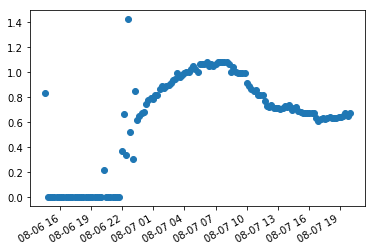

In [12]:
plt.plot_date(t, data['InstrumentTelemetry.mean_H1'])
plt.gcf().autofmt_xdate() 
plt.show()
plt.close()

In the above, the X axis has a "Month-Day Hour" labeling. If we want to control it ourselves...

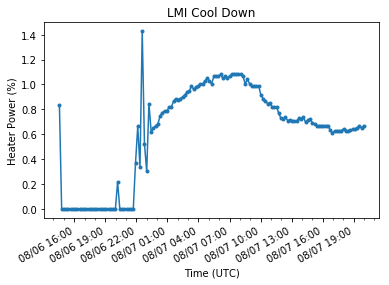

In [13]:
import matplotlib.dates as mdates

# These generate the locations of the ticks automagically
#   and can be passed in to something else for use
hours6 = mdates.HourLocator(interval=3)   # every 6 hours
hoursAll = mdates.HourLocator()           # every hour
fmt = mdates.DateFormatter('%m/%d %H:%M')

# Set the X major and minor tick locations
plt.gca().xaxis.set_major_locator(hours6)
plt.gca().xaxis.set_minor_locator(hoursAll)

# Set the X major tick appearance/format
plt.gca().xaxis.set_major_formatter(fmt)

plt.plot_date(t, data['InstrumentTelemetry.mean_H1'], ls="-", marker='.')
plt.gcf().autofmt_xdate()
plt.xlabel("Time (UTC)")
plt.ylabel("Heater Power (%)")
plt.title("LMI Cool Down")
plt.show()
plt.close()

Ok, hold up. WTF are ```plt.gcf()``` and ```plt.gca()```?

Under the hood, the plot is being constructed and managed via a series of objects.  In matplotlib, the primary objects are the "figure" and the "axes" and ```gcf()``` and ```gca()``` allows the user a way to interact with them even if you're not keeping track of them yourself.  Most of the stuff in the ```pyplot``` module is really just a way to get at those underlying objects in a simplified manner.

```gcf()``` == "GetCurrentFigure" and ```gca()``` == "GetCurrentAxes"

To avoid these shenanigans, it's necessary to construct the plot objects yourself and interact with them directly. No big deal.

We'll need a figure object https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html, which will control the overall viewpoint and whole shebang.  We'll also need an axes object https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axes.html, which will do all the hard stuff.

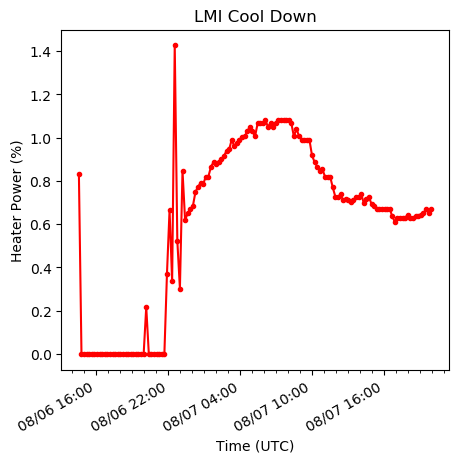

In [14]:
# Create a basic working set of objects
#   figsize is in units of inches, dpi is the resolution in dots per inch
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = plt.axes()

# Exactly the same as before

hours6 = mdates.HourLocator(interval=6)   # every 6 hours
hoursAll = mdates.HourLocator()           # every hour
fmt = mdates.DateFormatter('%m/%d %H:%M')

# Set the X major and minor tick locations

ax.xaxis.set_major_locator(hours6)
ax.xaxis.set_minor_locator(hoursAll)

# Set the X major tick appearance/format
ax.xaxis.set_major_formatter(fmt)

ax.plot_date(t, data['InstrumentTelemetry.mean_H1'], ls="-", marker='.', color='red')
fig.autofmt_xdate()
ax.set_xlabel("Time (UTC)")
ax.set_ylabel("Heater Power (%)")
ax.set_title("LMI Cool Down")
plt.show()
plt.close()

See?  That wasn't so bad. The only real change was that instead of ```plt.xlabel()``` we had to call upon ```ax.set_xlabel()``` and so on.  There are lots of these little quirks, and they just get easier with both experience in making plots and experience in finding the right bit of documentation.

Let's kick it up a notch.

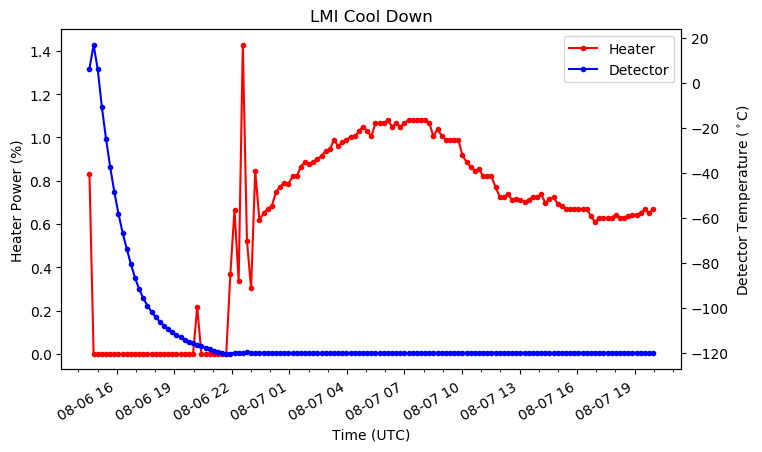

In [15]:
# Create a basic working set of objects
#   figsize is in units of inches, dpi is the resolution in dots per inch
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = plt.axes()

# Exactly the same as before
hours6 = mdates.HourLocator(interval=6)   # every 6 hours
hoursAll = mdates.HourLocator()           # every hour
fmt = mdates.DateFormatter('%m/%d %H:%M')

# Set the X major and minor tick locations
ax.xaxis.set_major_locator(hours6)
ax.xaxis.set_minor_locator(hoursAll)

# Set the X major tick appearance/format
ax.xaxis.set_major_formatter(fmt)

ax.plot_date(t, data['InstrumentTelemetry.mean_H1'], ls="-", marker='.', color='red', label='Heater')
fig.autofmt_xdate()
ax.set_xlabel("Time (UTC)")
ax.set_ylabel("Heater Power (%)")
ax.set_title("LMI Cool Down")

# Now the new stuff. Plot another variable, on the same x scale
ax2 = ax.twinx()
ax2.plot_date(t, data['InstrumentTelemetry.mean_T1'], ls="-", marker='.', color='blue', label='Detector')
ax2.set_ylabel("Detector Temperature ($^\circ$C)")

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.show()
plt.close()

If you look at the X axis, you'll notice that our carefully crafted formatting got screwed up when we put in the twin X axis.  It's a good practice to save all of your plot formatting for just before your plt.show() call to ensure that matplotlib's automatic formatting doesn't mess anything up!  This is our final product:

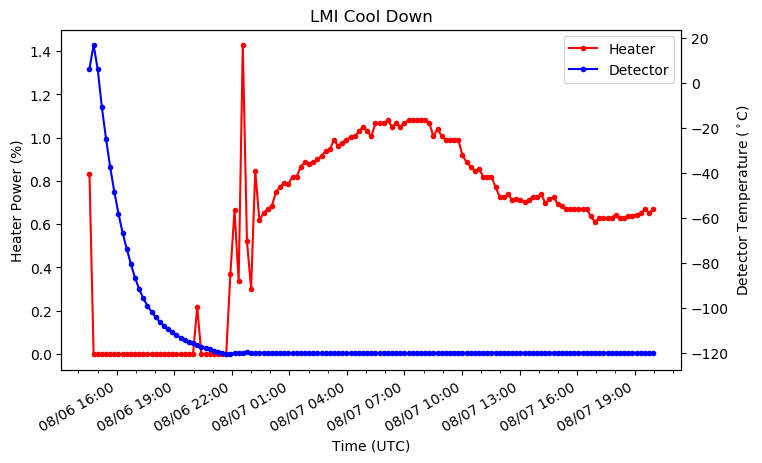

In [16]:
# Create a basic working set of objects
#   figsize is in units of inches, dpi is the resolution in dots per inch
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = plt.axes()

# Exactly the same as before
hours6 = mdates.HourLocator(interval=6)   # every 6 hours
hoursAll = mdates.HourLocator()           # every hour
fmt = mdates.DateFormatter('%m/%d %H:%M')

# Set the X major and minor tick locations
ax.xaxis.set_major_locator(hours6)
ax.xaxis.set_minor_locator(hoursAll)

ax.plot_date(t, data['InstrumentTelemetry.mean_H1'], ls="-", marker='.', color='red', label='Heater')
fig.autofmt_xdate()

# Now the new stuff. Plot another variable, on the same x scale
ax2 = ax.twinx()
ax2.plot_date(t, data['InstrumentTelemetry.mean_T1'], ls="-", marker='.', color='blue', label='Detector')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Pretty everything up
ax.set_xlabel("Time (UTC)")
ax.set_ylabel("Heater Power (%)")
ax.set_title("LMI Cool Down")
ax2.set_ylabel("Detector Temperature ($^\circ$C)")

# Set the X major tick appearance/format
ax.xaxis.set_major_formatter(fmt)

plt.show()
plt.close()

One parting remark; why did we go through the trouble of making the time stamp into a datetime object so long ago?  Because datetime objects can be added/subtracted manipulated trivially, and you don't have to worry about any calendar math shenanigans. If we plot the stuff above as a function of ```t-t[0]``` then we suddenly have a plot of the LMI cooldown starting from 0, making it super trivial to see the elapsed time at a glance.

In [17]:
newTime = t - t[0]

TypeError: unsupported operand type(s) for -: 'list' and 'datetime.datetime'

Remember that list comprehension above?  It's not just a clever name, because ```t``` is a *list* type and you can't do math on list types.  But if we convert it to a numpy array first, we can do some stuff.  We just have to fiddle with our formatting on the X axis more since matplotlib doesn't jive with timedelta objects...yet.

(*one datetime object added or subtracted to another yeilds a new object type, datetime.timedelta. It doesn't have quite the same methods and properties as a fully fledged datetime object*)

In [ ]:
t = np.array(t)
relTime = t - t[0]
print(relTime)
newTime = [ct.total_seconds()/60./60. for ct in relTime]
print(newTime)

In [ ]:
# Create a basic working set of objects
#   figsize is in units of inches, dpi is the resolution in dots per inch
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = plt.axes()

ax.plot(newTime, data['InstrumentTelemetry.mean_H1'], ls="-", marker='.', color='red', label='Heater')
ax.plot(newTime, data['InstrumentTelemetry.mean_T2'], ls="-", marker='.', color='purple', label='Heater')

# Now the new stuff. Plot another variable, on the same x scale
ax2 = ax.twinx()
ax2.plot(newTime, data['InstrumentTelemetry.mean_T1'], ls="-", marker='.', color='blue', label='Detector')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Pretty everything up
ax.set_xlabel("Elapsed Time (hours)")
ax.set_ylabel("Heater Power (%)")
ax.set_title("LMI Cool Down")
ax2.set_ylabel("Detector Temperature ($^\circ$C)")

plt.show()
plt.close()

Introduction Is Now Over
========================

You should now be able to at least muddle through most (if not all) of the official matplotlib examples

https://matplotlib.org/gallery/index.html

Go play! They give you both the source code and an interactive notebook (like this).